In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [106]:
data = pd.read_csv('Housing.csv')

In [107]:
data.head()
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

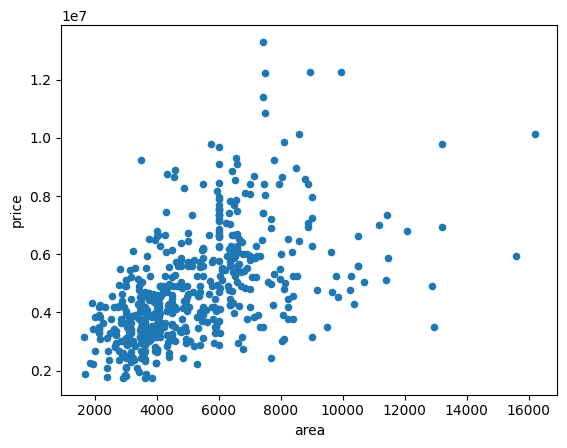

In [108]:
data.plot(kind='scatter',x='area',y='price')
plt.show()

Normalizing Data Set

In [146]:
data.columns
y_train=data['price']
dataset=data.iloc[:,1:]
dataset=dataset.replace(["yes","no","furnished","unfurnished","semi-furnished"],[1,0,1,-1,0])
# display(dataset)

In [147]:
for column in dataset.columns: 
    dataset[column] = (dataset[column]) / dataset[column].std()     

In [148]:
dataset.head()
X_train=dataset

Model

In [149]:
class LinearRegression:
    def __init__(self,learning_rate=0.01,iterations=1000):
        self.learning_rate=learning_rate
        self.iterations=iterations
        self.weights=None
        self.biases=None

    def fit(self,X,y):
        n_samples,n_features=X.shape
        # print(X.shape)
        self.weights=np.random.rand(n_features)
        print(self.weights.shape)
        self.biases=0

        for _ in range(self.iterations):
            #with weights dimensions #featuresX 
            y_p = np.dot(X, self.weights)+self.biases

            #calculating gradient
            dw = (1/n_samples)*np.dot(X.T,(y_p-y))
            db = (1/n_samples)*np.sum(y_p-y)
            # print(dw)

            #updating parameters
            self.weights -= self.learning_rate * dw
            self.biases -= self.learning_rate * db
        return self
    
        
    def predict(self, X):
        print(self.weights)
        y_approximated = np.dot(X, self.weights) + self.biases
        return y_approximated

In [150]:
# X_train=np.reshape(X_train,(-1,1))
X_train.shape


(545, 12)

In [160]:
model = LinearRegression(learning_rate=0.005, iterations=1000)
model.fit(X_train, y_train)
predict=model.predict(X_train)

(12,)
[510573.800713    85734.51845077 485898.98116454 374254.4117014
 141039.33965526 123301.93597374 156720.97847931 180659.87251054
 402247.65603922 247484.81177532 277767.9319597  170874.29156421]


In [161]:
predict

array([ 8184969.06998001, 10545349.36968242,  7474010.42490362,
        8387789.07252317,  6782120.27539352,  8295555.73810507,
        9631898.10754122,  8359714.97299083,  7596751.77037123,
        7693286.61662161,  8358414.08534515,  8155689.06901958,
        7037188.70683412,  6174676.07676519,  6063159.96853877,
        5036825.95690431,  7474763.24964716,  8099676.15989705,
        6641337.19847818,  6890441.94140106,  5388162.79412641,
        6690353.96201265,  6095516.03613646,  6672858.69739087,
        7307415.93754797,  8196748.79382994,  8017466.28894178,
        4550231.97689365,  7217115.93405358,  7118328.69797407,
        7409663.69473737,  6555317.03535706,  6868713.41517278,
        6655688.69149558,  6474580.40578382,  7746767.89581377,
        7794192.46207192,  8333473.63047065,  6417680.01731355,
        7115984.46990936,  6219367.33448925,  7676353.33831151,
        7175567.87956212,  6538513.67417712,  7340413.71226075,
        6281158.75973731,  7224252.32971

In [153]:
from sklearn import linear_model

In [154]:
model2=linear_model.LinearRegression()
model2.fit(X_train,y_train)

LinearRegression()

In [155]:
model2.predict(X_train)

array([ 8201865.4994051 , 10638380.23666681,  7542628.07268388,
        8408698.53020234,  6771486.96259185,  8334747.49458946,
        9710889.51208246,  8514703.09449335,  7584399.24465676,
        7717327.43527943,  8410819.47648118,  8209030.40806562,
        7046301.57103504,  6167605.81723848,  6098291.56137893,
        5060287.29954373,  7501266.00075273,  8149146.47006858,
        6595157.0812944 ,  6895119.28922268,  5403985.36960561,
        6699498.45778086,  6075496.76011547,  6663541.52845016,
        7321535.5010442 ,  8192792.78781791,  8069632.66120089,
        4553941.69895365,  7304016.64916943,  7148125.69943507,
        7472766.34770251,  6581210.07040687,  6852164.85075369,
        6713890.30012284,  6469709.71705742,  7783286.13916523,
        7837030.13481457,  8390574.30017043,  6422145.90845983,
        7165880.21952013,  6229267.40137124,  7714670.05526345,
        7230078.99486996,  6592032.26201703,  7379068.00097785,
        6316228.67806434,  7259593.61451